In [63]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
#use 
import os 
os.getcwd() 
os.chdir('/content/gdrive/My Drive/app/Darknet_colab/pyimage') 

In [65]:
!ls

test1.jpg  Untitled0.ipynb  yolo


In [0]:
# import the necessary packages
import numpy as np
import argparse
import time
import cv2
import os


In [0]:
# load the COCO class labels our YOLO model was trained on
labelsPath = os.path.sep.join(['yolo', "obj.names"])
LABELS = open(labelsPath).read().strip().split("\n")

In [68]:
print(LABELS)

['stopsign', 'yieldsign']


In [69]:
# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

# derive the paths to the YOLO weights and model configuration
weightsPath = os.path.sep.join(["yolo", "yolov3-tiny-obj_4000.weights"])
configPath = os.path.sep.join(["yolo", "yolov3-tiny-obj.cfg"])

# load our YOLO object detector trained on COCO dataset (80 classes)
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

[INFO] loading YOLO from disk...


In [0]:
# load our input image and grab its spatial dimensions
image = cv2.imread("test1.jpg")



In [71]:
print(H)

277


In [0]:
#download files
def imShow1(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = path
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [0]:


def nhandang(image):
  (H, W) = image.shape[:2]
  # determine only the *output* layer names that we need from YOLO
  ln = net.getLayerNames()
  ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

  # construct a blob from the input image and then perform a forward
  # pass of the YOLO object detector, giving us our bounding boxes and
  # associated probabilities
  blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
    swapRB=True, crop=False)
  net.setInput(blob)
  start = time.time()
  layerOutputs = net.forward(ln)
  end = time.time()

  # show timing information on YOLO
  print("[INFO] YOLO took {:.6f} seconds".format(end - start))

  # initialize our lists of detected bounding boxes, confidences, and
  # class IDs, respectively
  boxes = []
  confidences = []
  classIDs = []

  # loop over each of the layer outputs
  for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
      # extract the class ID and confidence (i.e., probability) of
      # the current object detection
      scores = detection[5:]
      classID = np.argmax(scores)
      confidence = scores[classID]

      # filter out weak predictions by ensuring the detected
      # probability is greater than the minimum probability
      if confidence > 0.5:
        # scale the bounding box coordinates back relative to the
        # size of the image, keeping in mind that YOLO actually
        # returns the center (x, y)-coordinates of the bounding
        # box followed by the boxes' width and height
        box = detection[0:4] * np.array([W, H, W, H])
        (centerX, centerY, width, height) = box.astype("int")

        # use the center (x, y)-coordinates to derive the top and
        # and left corner of the bounding box
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))

        # update our list of bounding box coordinates, confidences,
        # and class IDs
        boxes.append([x, y, int(width), int(height)])
        confidences.append(float(confidence))
        classIDs.append(classID)

  # apply non-maxima suppression to suppress weak, overlapping bounding
  # boxes
  idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,	0.3)

  # ensure at least one detection exists
  if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
      # extract the bounding box coordinates
      (x, y) = (boxes[i][0], boxes[i][1])
      (w, h) = (boxes[i][2], boxes[i][3])

      # draw a bounding box rectangle and label on the image
      color = [int(c) for c in COLORS[classIDs[i]]]
      cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
      text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
      cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, color, 2)
  imShow1(image) 

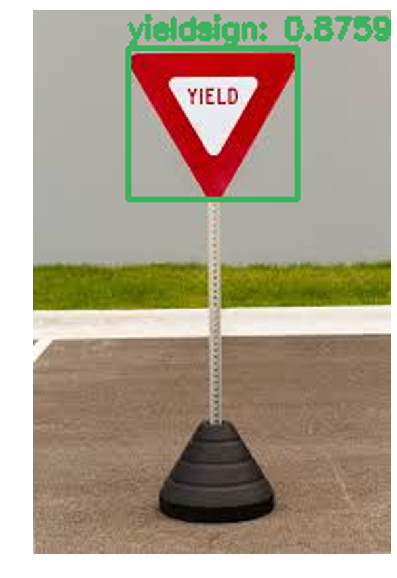

In [79]:
imShow1(image)

[INFO] YOLO took 0.081916 seconds


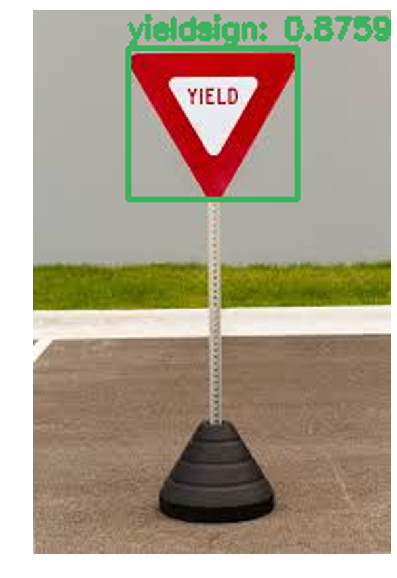

In [81]:
# load our input image and grab its spatial dimensions
image = cv2.imread("test1.jpg")
nhandang(image)

[INFO] YOLO took 0.082914 seconds


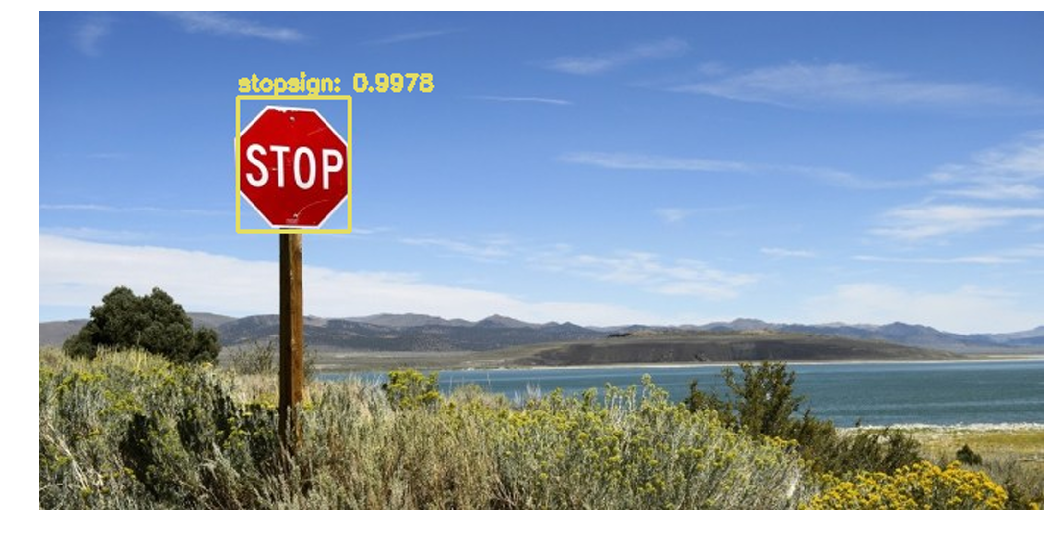

In [87]:
# load our input image and grab its spatial dimensions
image = cv2.imread("test2.jpg")
nhandang(image)

[INFO] YOLO took 0.126001 seconds


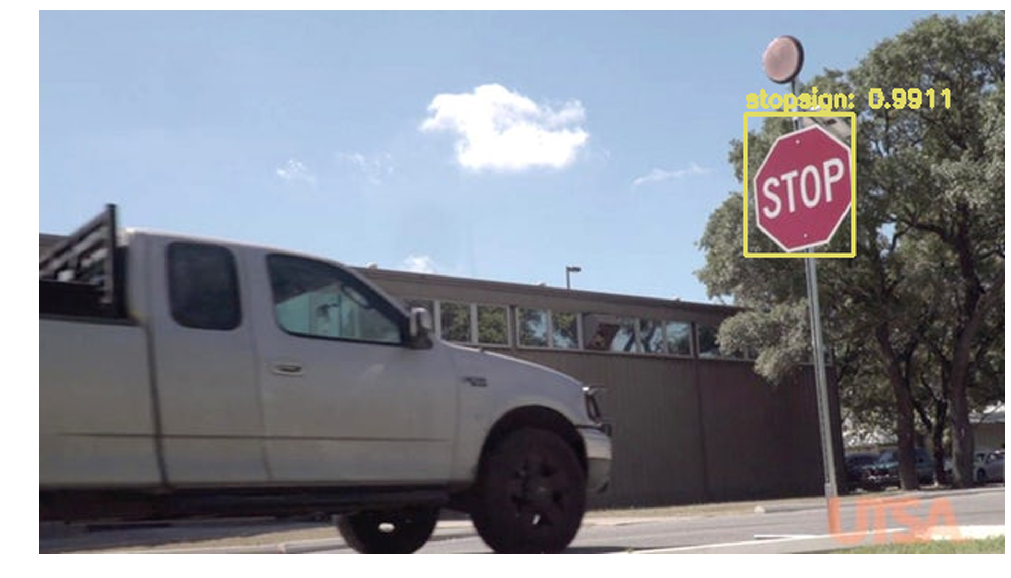

In [88]:
# load our input image and grab its spatial dimensions
image = cv2.imread("test3.jpg")
nhandang(image)

[INFO] YOLO took 0.114337 seconds


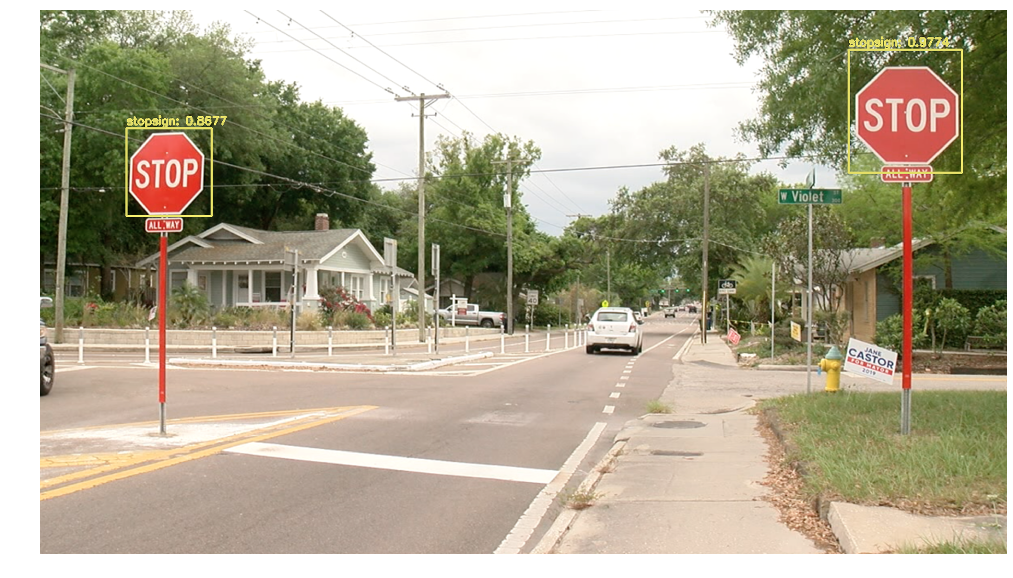

In [91]:
# load our input image and grab its spatial dimensions
image = cv2.imread("test4.png")
nhandang(image)

[INFO] YOLO took 0.119191 seconds


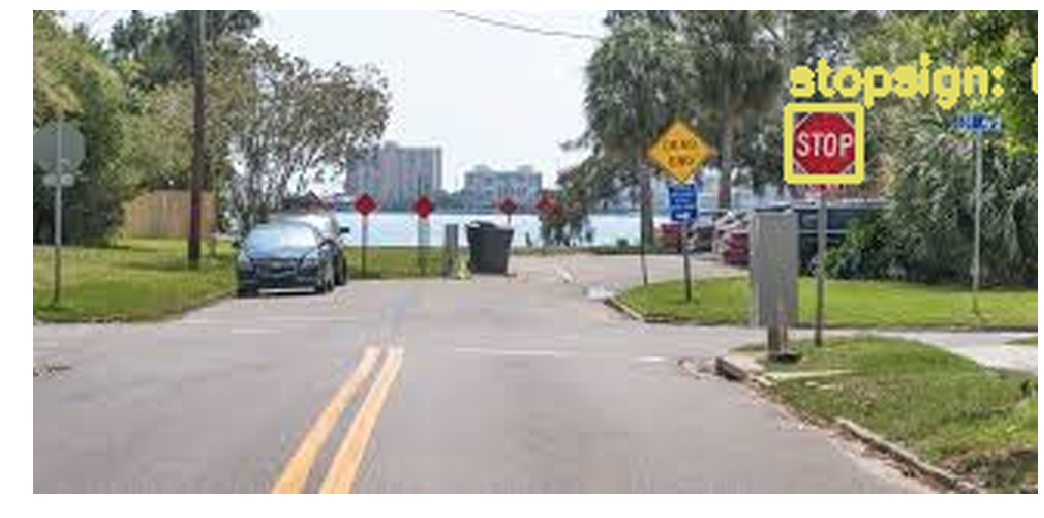

In [93]:
# load our input image and grab its spatial dimensions
image = cv2.imread("test5.jpg")
nhandang(image)

[INFO] YOLO took 0.131933 seconds


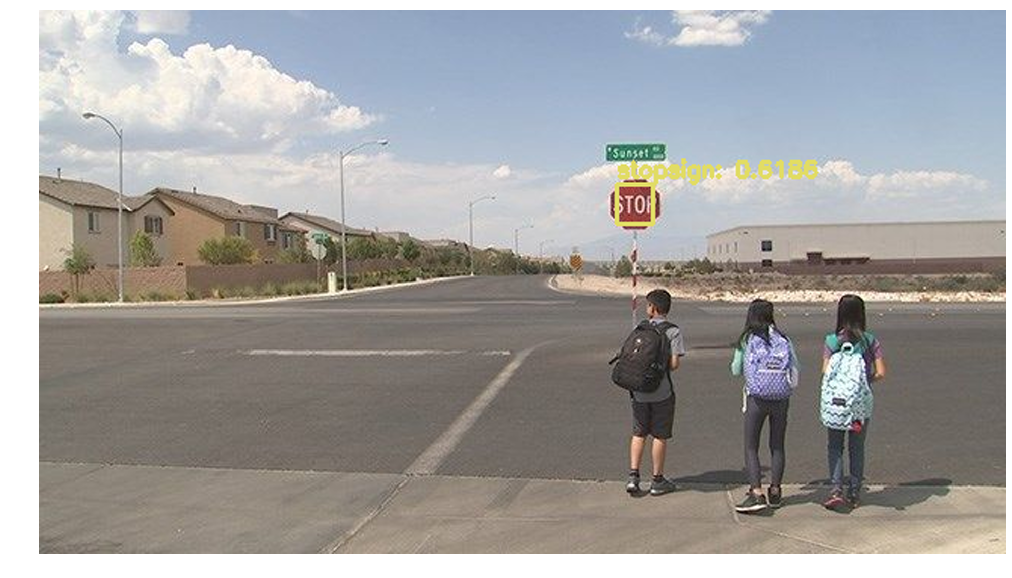

In [94]:
# load our input image and grab its spatial dimensions
image = cv2.imread("test6.jpg")
nhandang(image)